In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
colors = pd.read_csv('data/colors.csv')
inventories = pd.read_csv('data/inventories.csv')
inventory_parts = pd.read_csv('data/inventory_parts.csv')
inventory_sets = pd.read_csv('data/inventory_sets.csv')
part_categories = pd.read_csv('data/part_categories.csv')
parts = pd.read_csv('data/parts.csv')
lego_sets = pd.read_csv('data/sets.csv')
themes = pd.read_csv('data/themes.csv')

# Sets

In [128]:
lego_sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [129]:
lego_sets.describe()

,year,theme_id,num_parts
count,11673.000000,11673.000000,11673.000000
mean,2001.972758,311.308575,162.262400
std,13.475364,177.999101,330.192108
min,1950.000000,1.000000,-1.000000
25%,1997.000000,161.000000,10.000000
50%,2005.000000,324.000000,45.000000
75%,2012.000000,470.000000,172.000000
max,2017.000000,614.000000,5922.000000


In [130]:
lego_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    11673 non-null  object
 1   name       11673 non-null  object
 2   year       11673 non-null  int64 
 3   theme_id   11673 non-null  int64 
 4   num_parts  11673 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 456.1+ KB


Text(0.5, 1.0, 'Volume of Lego Sets Released by Year')

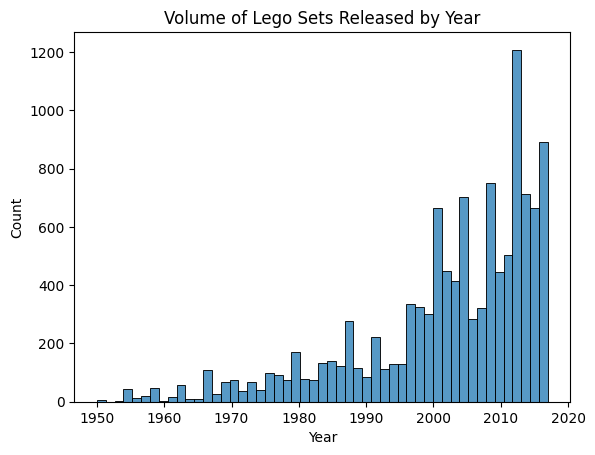

In [131]:
fig = sns.histplot(lego_sets['year'])
fig.set_xlabel('Year')
fig.set_title('Volume of Lego Sets Released by Year')

Text(0.5, 1.0, 'Average Number of Parts for One Set by Year')

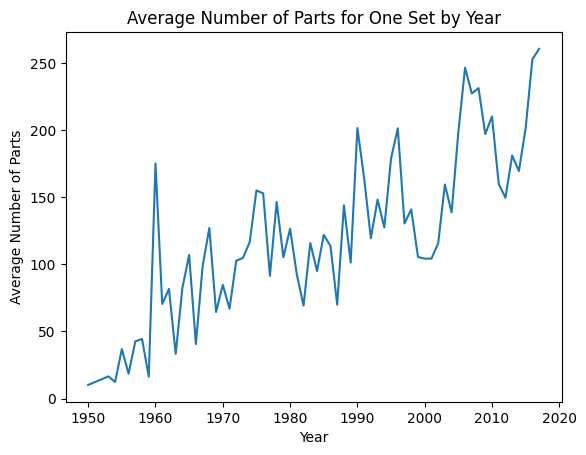

In [132]:
avg_pts_year = lego_sets.groupby('year')['num_parts'].mean()

fig = sns.lineplot(avg_pts_year)
fig.set_ylabel('Average Number of Parts')
fig.set_xlabel('Year')
fig.set_title('Average Number of Parts for One Set by Year')

In [133]:
lego_sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [134]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [135]:
# merge lego sets and themes dataframes so each set has a theme
sets_merged = pd.merge(lego_sets, themes, left_on='theme_id', right_on='id', how='inner')

sets_merged = sets_merged.drop(['id', 'parent_id'], axis=1)

new_col_names = {'name_x':'set_name', 'name_y':'theme'}
sets_merged.rename(columns=new_col_names, inplace=True)

In [136]:
sets_merged.head()

,set_num,set_name,year,theme_id,num_parts,theme
0,00-1,Weetabix Castle,1970,414,471,Castle
1,0011-2,Town Mini-Figures,1978,84,12,Supplemental
2,2181-1,Infomaniac,1997,84,4,Supplemental
3,300-1,T-Junction Road Plates,1978,84,2,Supplemental
4,301-1,Curved Road Plates,1978,84,2,Supplemental


In [137]:
sets_merged.theme.nunique()

386

Text(0.5, 1.0, 'Total Lego Themes per Year')

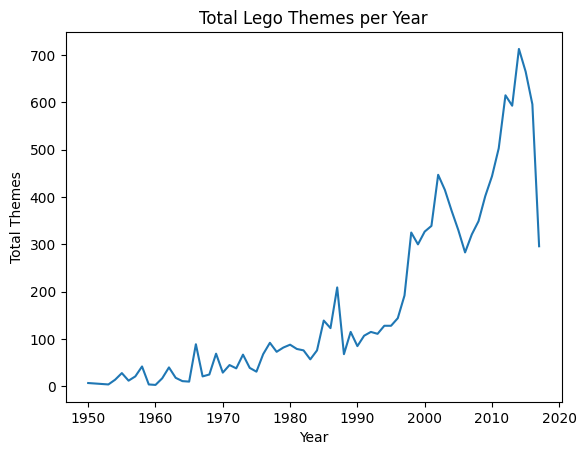

In [138]:
themes_by_year = sets_merged.groupby('year')['theme'].count()

fig = sns.lineplot(themes_by_year)

fig.set_ylabel('Total Themes')
fig.set_xlabel('Year')
fig.set_title('Total Lego Themes per Year')

In [139]:
avg_pts_theme = sets_merged.groupby('theme')['num_parts'].mean()

In [140]:
avg_pts_theme.sort_values(ascending=False)

theme
Modular Buildings            2350.583333
Mosaic                       1843.250000
Sculptures                   1716.695652
Ultimate Collector Series    1680.333333
FIRST LEGO League            1387.000000
                                ...     
Power Functions                 1.882353
Imperial Guards                 1.000000
Key Chain                       0.181818
Samsonite                       0.000000
Wooden Box Set                 -1.000000
Name: num_parts, Length: 386, dtype: float64

# Parts

In [141]:
part_categories.head()

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [142]:
parts.head()

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [143]:
# merge parts and category dataframes so each part has a category
parts_merged = pd.merge(parts, part_categories, left_on='part_cat_id', right_on='id', how='inner')

parts_merged.drop(columns='id', inplace=True)

new_col_names = {'name_x':'part_name', 'name_y':'category'}
parts_merged.rename(columns=new_col_names, inplace=True)

In [144]:
parts_merged.head()

,part_num,part_name,part_cat_id,category
0,0687b1,Set 0687 Activity Booklet 1,17,Non-LEGO
1,10016414,Sticker Sheet #1 for 41055-1,17,Non-LEGO
2,10019stk01,Sticker for Set 10019 - (43274/4170393),17,Non-LEGO
3,10026stk01,Sticker for Set 10026 - (44942/4184185),17,Non-LEGO
4,10029stk01,Sticker for Set 10029 - (4216816),17,Non-LEGO


In [150]:
parts_merged.groupby('category')['part_num'].count().sort_values(ascending=False).head()

category
Minifigs                   8556
Minifig Accessories        2071
Non-LEGO                   1964
Duplo, Quatro and Primo    1552
Tiles Printed              1191
Name: part_num, dtype: int64